####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm and using k fold
####Step 5: Using GridSearchCV for finding the hidden layers and no. of neurons
####Step 6: Finding accuracy, specificity 

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for MLPClassifier
from sklearn.neural_network import MLPClassifier
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
#GridSearchCV
from sklearn.model_selection import GridSearchCV

Data Preprocessing

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
BreastCancer_Data = pd.read_csv("Breast Cancer Data.csv") 
#Printing the top 5 rows from dataframe
BreastCancer_Data.head()

Saving Breast Cancer Data.csv to Breast Cancer Data (4).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Getting how many rows and columns
BreastCancer_Data.shape

(569, 33)

In [ ]:
#Getting the information of each feature
BreastCancer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Checking the null values
BreastCancer_Data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Droping the column is not useful
BreastCancer_Data.drop(columns='Unnamed: 32',inplace=True)

In [ ]:
BreastCancer_Data.drop(columns='id',inplace=True)

In [ ]:
#Getting the Statistical Information
BreastCancer_Data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Checking the columns
BreastCancer_Data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Data Exploring and data visualization

In [ ]:
#Get count of number of M or B cells in diagnosis
BreastCancer_Data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#Grouping the type of glass and taking the count
df = pd.DataFrame(BreastCancer_Data.groupby(by = ['diagnosis']).size().reset_index(name = 'count'))
#Getting count of type of glass
fig = px.pie(df, values="count" , names ="diagnosis",color_discrete_sequence = px.colors.sequential.RdBu, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Diagnosis')
fig.show()

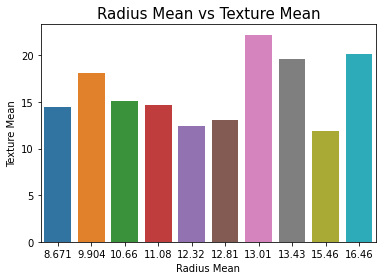

In [ ]:
sns.barplot(x="radius_mean", y="texture_mean", data=BreastCancer_Data[170:180])
plt.title("Radius Mean vs Texture Mean",fontsize=15)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()
plt.style.use("ggplot")

In [ ]:
df = BreastCancer_Data.copy()

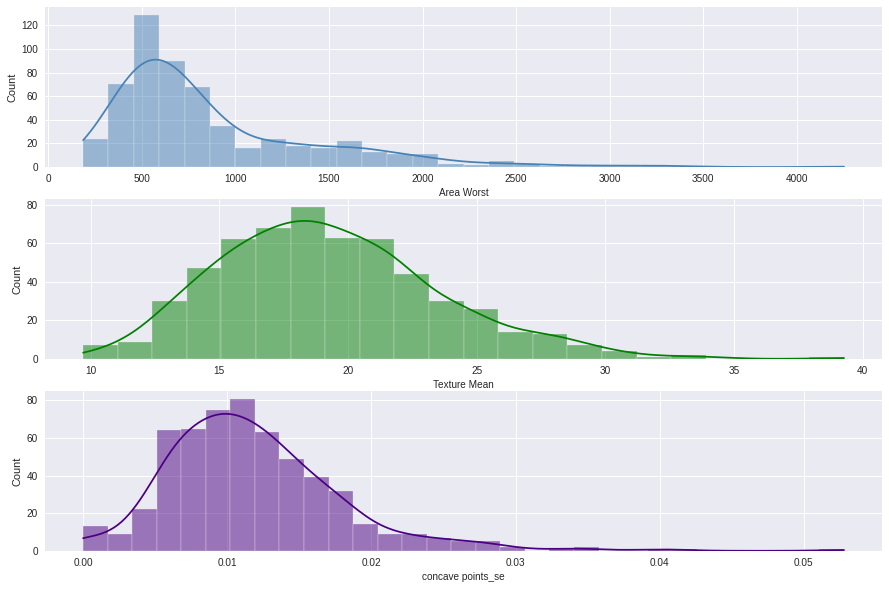

In [ ]:
#Setting the subplot figure size
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,10)) 
#Histplot for RI
sns.histplot(x = df["area_worst"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Area Worst",fontsize=10);
#Histplot for Na
sns.histplot(x = df["texture_mean"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Texture Mean",fontsize=10);
#Histplot for Mg
sns.histplot(x = df["concave points_se"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("concave points_se",fontsize=10);

In [ ]:
df = df.iloc[:, : 10]

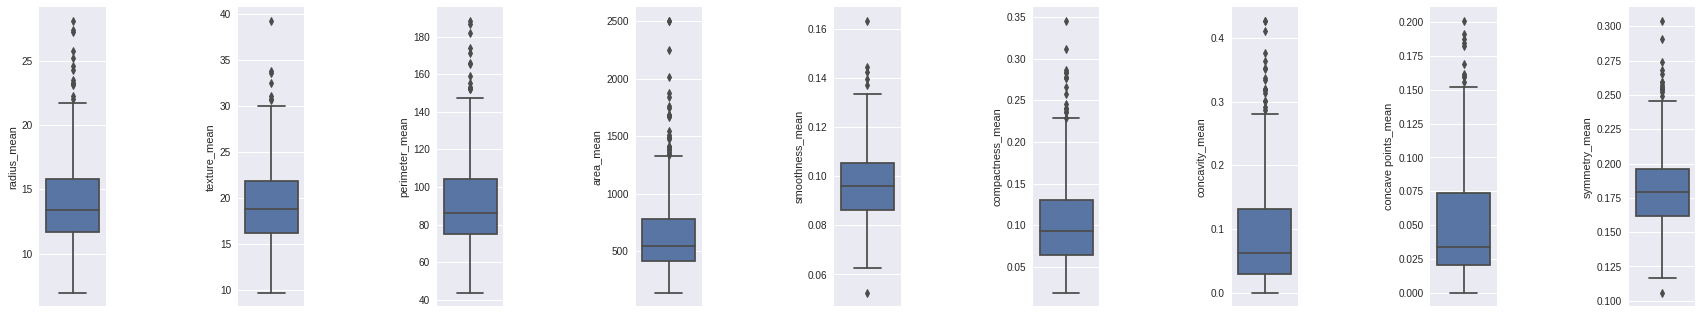

In [ ]:
data_to_plot = df.iloc[:, 1:]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
plt.subplots_adjust(right=3, wspace=2)
for i, col in enumerate(data_to_plot.columns):
  sns.boxplot(y=data_to_plot[col], ax = ax[i])

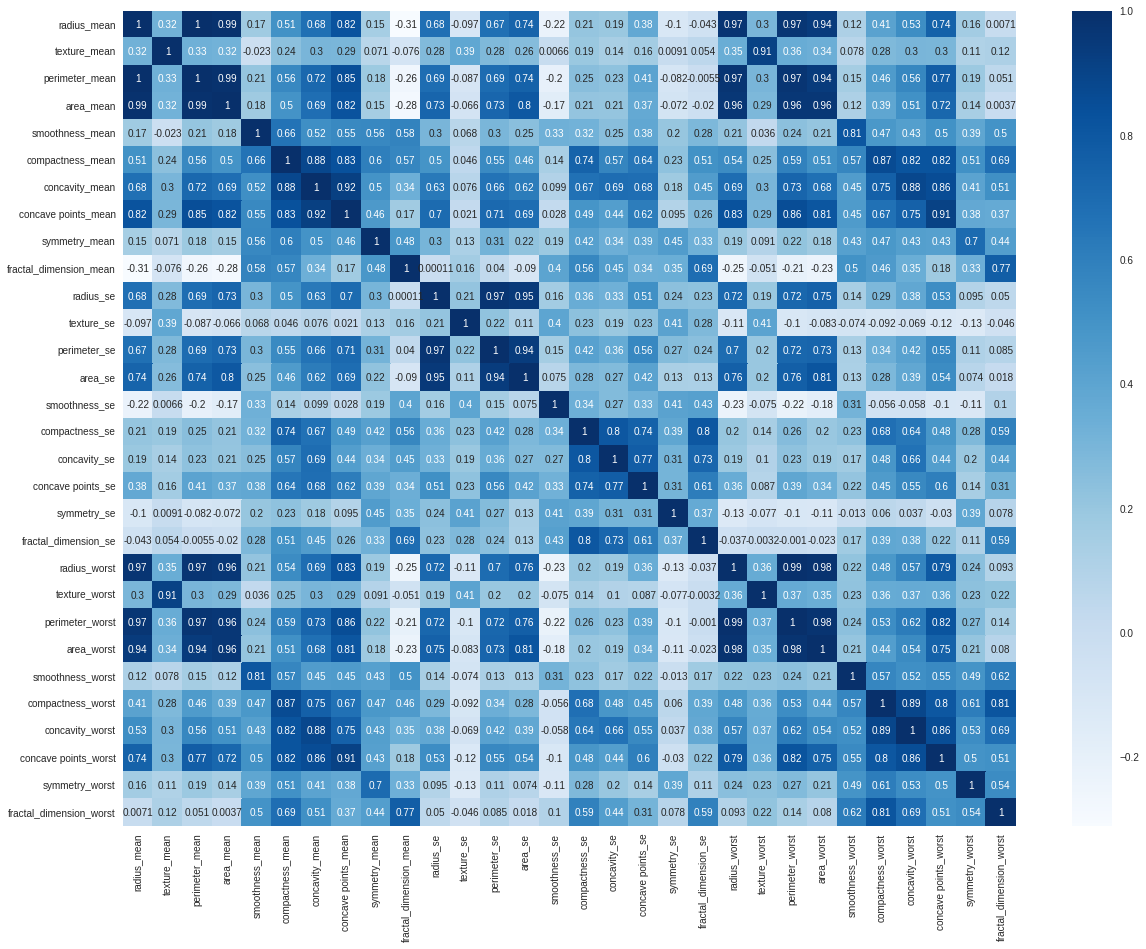

In [ ]:
#Seeing the correlation for each feature using the heatmap
fig, ax = plt.subplots(figsize=(20,15))
fig.patch.set_facecolor('white')
sns.heatmap(BreastCancer_Data.corr(), ax=ax, annot=True, cmap="Blues")

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
BreastCancer_Data['diagnosis'] = labelencoder.fit_transform(BreastCancer_Data['diagnosis'])

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(BreastCancer_Data))
BreastCancer_Data = BreastCancer_Data[(z < 3).all(axis=1)]

In [ ]:
#Creating the variable x and y
x = BreastCancer_Data.drop('diagnosis', axis=1)
y = BreastCancer_Data['diagnosis']

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(396, 30)
(396,)
(99, 30)
(99,)


In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,),max_iter=200)

In [ ]:
for train_index, test_index in kfold.split(x,y):
  classifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = classifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = classifier.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 98.98989898989899
MLP model accuracy(in %) for Testing: 96.96969696969697


In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,50),max_iter=200)

In [ ]:
for train_index, test_index in kfold.split(x,y):
  classifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = classifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = classifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 100.0
MLP model accuracy(in %) for Testing: 98.98989898989899


In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=200)

In [ ]:
for train_index, test_index in kfold.split(x,y):
  classifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = classifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = classifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 100.0
MLP model accuracy(in %) for Testing: 97.97979797979798


In [ ]:
params = {'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)]}

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=0), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Accuracy : 1.000
Test Accuracy : 0.980
Best Accuracy Through Grid Search : 0.980
Best Parameters :  {'hidden_layer_sizes': (50, 100)}


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Linear Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Linear Discriminat Analysis :",result2)

Confusion Matrix for Linear Discriminat Analysis :
[[68  1]
 [ 1 29]]
Classification Report for Linear Discriminat Analysis :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.97      0.97      0.97        30

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

Overall Accuracy For Linear Discriminat Analysis : 97.97979797979798


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 97.60869565217392
Specificity:  97.60869565217392


In [ ]:
probs = classifier.predict_proba(X_test)
preds = probs[:,1]

In [ ]:
roc = roc_auc_score(y_test, preds, average='weighted')*100
print('ROC Score:',roc)

ROC Score: 99.90338164251207


In [ ]:
f1=f1_score(y_test,y_pred,average='micro')*100
print('F1 Score:',f1)

F1 Score: 97.97979797979798


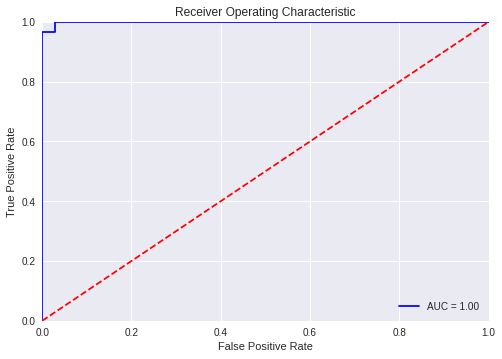

In [ ]:
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
data = {'MLP Classifier':[result2,TNR,TPR,f1,roc]}
pd.DataFrame(data, index =['Total Accuracy','F1 score', 'Sensitivity','Specificity','ROC - AUC'])  

,MLP Classifier
Total Accuracy,97.979798
F1 score,97.608696
Sensitivity,97.608696
Specificity,97.979798
ROC - AUC,99.903382
